In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import zipfile


zip_file_path = "/content/drive/MyDrive/archive.zip"
extract_dir = "/content"

if os.path.exists(zip_file_path):
  try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(extract_dir)
    print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
  except zipfile.BadZipFile:
    print(f"Error: '{zip_file_path}' is not valid zip file. ")
  except Exception as e:
    print(f"An error occurred: {e}")
else:
  print(f"Error: '{zip_file_path}' does not exsist.")

Successfully extracted '/content/drive/MyDrive/archive.zip' to '/content'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
# Setting the dataset path
train = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
valid = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'
test = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
size = 224

In [ ]:
# Train data generator with augmentation
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    height_shift_range=0.0,
    width_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(
    train,
    batch_size=164,
    target_size=(size, size),
    subset="training",
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

Found 63282 images belonging to 38 classes.


In [ ]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

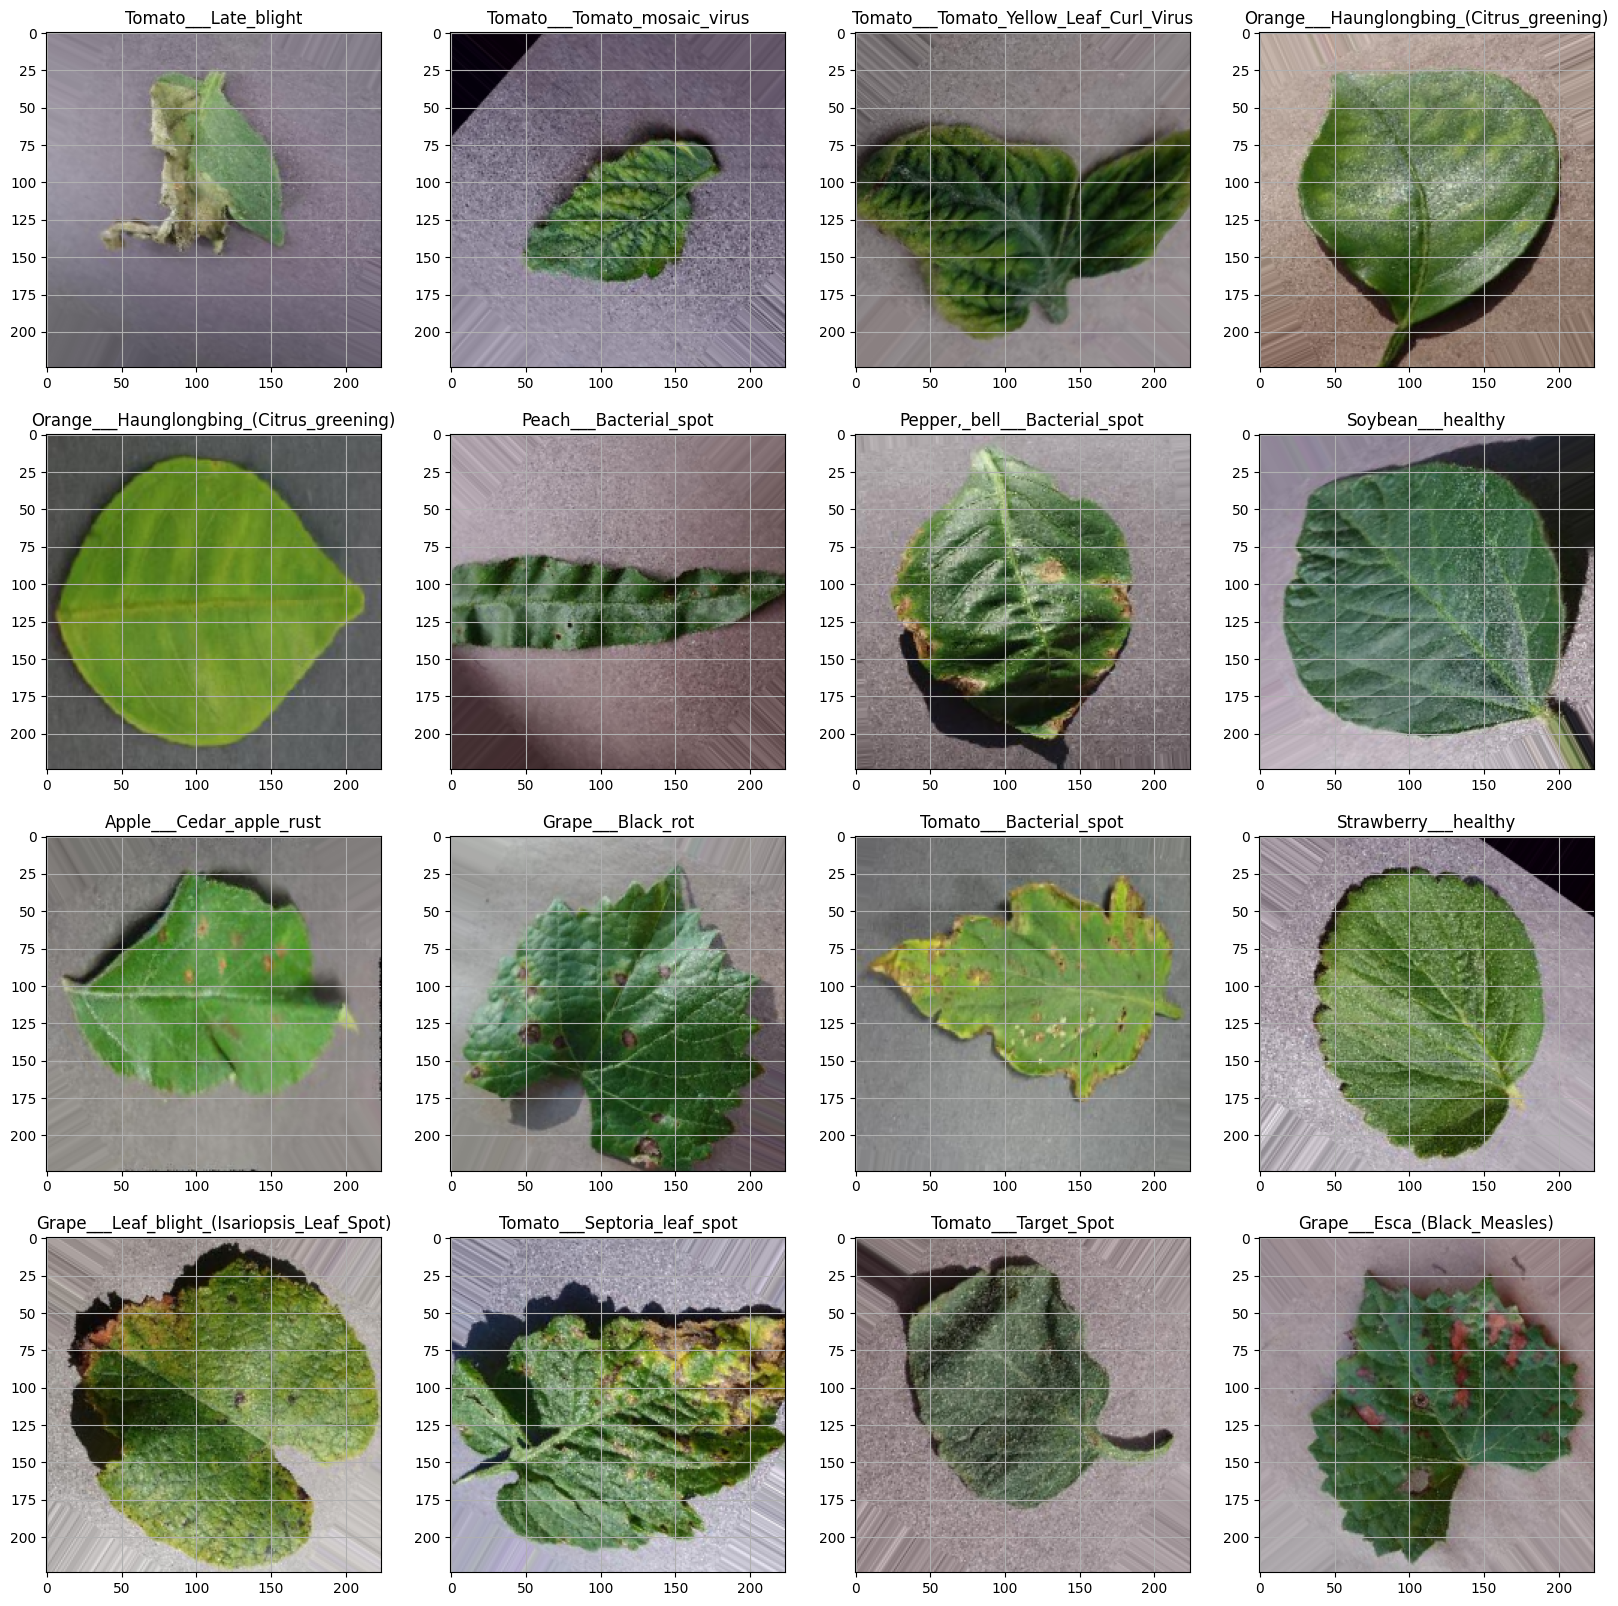

In [ ]:
# Display a batch of images
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20, 20))
for X_batch, y_batch in train_generator:
    for i in range(0, 16):
        plt.subplot(4, 4, i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i] == 1)[0][0]])
        plt.grid(None)
    plt.show()
    break

In [ ]:
# Validation data generator
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(
    valid,
    batch_size=164,
    target_size=(224, 224),
    subset='validation',
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 1742 images belonging to 38 classes.


In [ ]:
# Test data generator
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(
    test,
    batch_size=164,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)


Found 17572 images belonging to 38 classes.


In [ ]:
# Defining the CNN model
model = keras.models.Sequential()

# Adding layers to the model
model.add(keras.layers.Conv2D(
    filters=32,
    kernel_size=7,
    strides=1,
    padding="same",
    activation="relu",
    name="Conv1",
    input_shape=(224, 224, 3)
))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))
model.add(keras.layers.Conv2D(
    filters=64,
    kernel_size=5,
    strides=1,
    padding="same",
    activation="relu",
    name="Conv2"
))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))
model.add(keras.layers.Conv2D(
    filters=128,
    kernel_size=3,
    strides=1,
    padding="same",
    activation="relu",
    name="Conv3"
))
model.add(keras.layers.Conv2D(
    filters=256,
    kernel_size=3,
    strides=1,
    padding="same",
    activation="relu",
    name="Conv4"
))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))
model.add(keras.layers.Flatten(name="Flatten1"))
model.add(keras.layers.Dense(128, activation="relu", name="Dense1"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation="relu", name="Dense2"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(38, activation="softmax", name="Output"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Print the model summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard, CSVLogger, LearningRateScheduler, TerminateOnNaN

# EarlyStopping callback to stop training when validation loss stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# ModelCheckpoint callback to save the best model based on validation loss
model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True
)

# ReduceLROnPlateau callback to reduce learning rate when validation loss plateaus
model_ReduceLRonPlateau = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=15,
    min_lr=0.000001
)

# TensorBoard callback to log training process for visualization
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# CSVLogger callback to log training history to a CSV file
csv_logger = CSVLogger('training_log.csv', append=True)

# LearningRateScheduler callback for custom learning rate adjustments
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 10:
        lr = 0.0005
    if epoch > 20:
        lr = 0.0001
    return lr
lr_scheduler = LearningRateScheduler(lr_schedule)

# TerminateOnNaN callback to stop training if NaN values are encountered
terminate_on_nan = TerminateOnNaN()

# List of all callbacks to be used during training
callbacks = [
    early_stopping,
    model_checkpoint,
    model_ReduceLRonPlateau,
    tensorboard_callback,
    csv_logger,
    lr_scheduler,
    terminate_on_nan
]


In [ ]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=["accuracy", "precision", "recall"]
)

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=valid_generator,
    callbacks=callbacks
)

Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


386/386 ━━━━━━━━━━━━━━━━━━━━ 934s 2s/step - accuracy: 0.0520 - loss: 3.6534 - precision: 0.5579 - recall: 0.0110 - val_accuracy: 0.1194 - val_loss: 3.2110 - val_precision: 0.8448 - val_recall: 0.0281 - learning_rate: 0.0010
Epoch 2/7
386/386 ━━━━━━━━━━━━━━━━━━━━ 857s 2s/step - accuracy: 0.1551 - loss: 3.0222 - precision: 0.7485 - recall: 0.0397 - val_accuracy: 0.3944 - val_loss: 2.0703 - val_precision: 0.8352 - val_recall: 0.1280 - learning_rate: 0.0010
Epoch 3/7
386/386 ━━━━━━━━━━━━━━━━━━━━ 858s 2s/step - accuracy: 0.3297 - loss: 2.2608 - precision: 0.6986 - recall: 0.1294 - val_accuracy: 0.5540 - val_loss: 1.5648 - val_precision: 0.8953 - val_recall: 0.2652 - learning_rate: 0.0010
Epoch 4/7
386/386 ━━━━━━━━━━━━━━━━━━━━ 844s 2s/step - accuracy: 0.4450 - loss: 1.8608 - precision: 0.7336 - recall: 0.2348 - val_accuracy: 0.6320 - val_loss: 1.2490 - val_precision: 0.8540 - val_recall: 0.4265 - learning_rate: 0.0010
Epoch 5/7
386/386 ━━━━━━━━━━━━━━━━━━━━ 862s 2s/step - accuracy: 0.5177 - l

In [ ]:
# Extract metrics from the history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

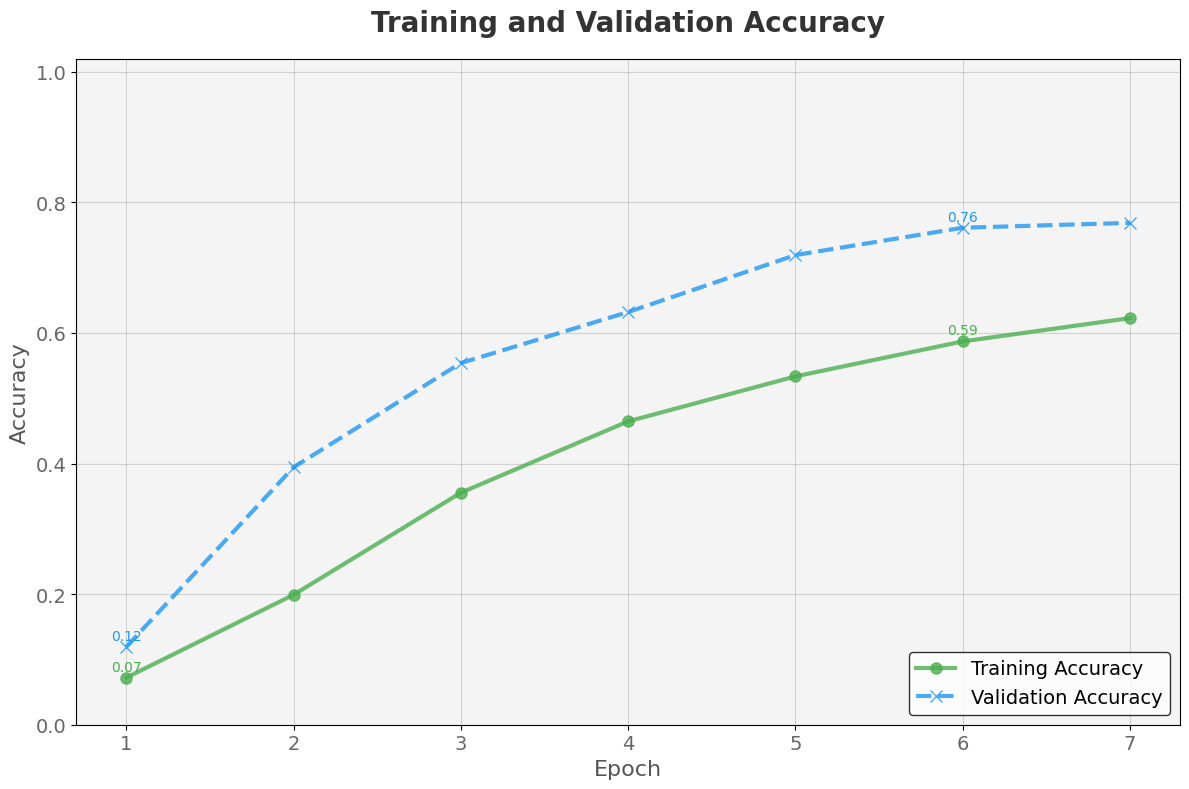

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 8))  # Larger figure size for better presentation
plt.plot(epochs, acc, color='#4CAF50', label='Training Accuracy', linestyle='-', marker='o', markersize=8, linewidth=3, alpha=0.8)
plt.plot(epochs, val_acc, color='#2196F3', label='Validation Accuracy', linestyle='--', marker='x', markersize=8, linewidth=3, alpha=0.8)

# Title and labels with enhanced styling
plt.title('Training and Validation Accuracy', fontsize=20, fontweight='bold', color='#333333', pad=20)
plt.xlabel('Epoch', fontsize=16, color='#555555')
plt.ylabel('Accuracy', fontsize=16, color='#555555')

# Set axis limits and improve grid
plt.ylim(0, 1.02)

# Add a grid with bold lines and a light background
plt.grid(True, linestyle='-', color='gray', alpha=0.3, linewidth=0.8)

# Customize ticks for better readability
plt.xticks(fontsize=14, color='#666666')
plt.yticks(fontsize=14, color='#666666')

# Customize background color for a modern look
plt.gca().set_facecolor('#F4F4F4')

# Add a legend with custom positioning and style
plt.legend(fontsize=14, loc='lower right', frameon=True, facecolor='white', edgecolor='black', framealpha=0.8)

# Adding annotations for a more professional touch
for i, txt in enumerate(acc):
    if i % 5 == 0:  # Annotate every 5th point for clarity
        plt.annotate(f'{txt:.2f}', (epochs[i], acc[i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='#4CAF50')

for i, txt in enumerate(val_acc):
    if i % 5 == 0:  # Annotate every 5th point for clarity
        plt.annotate(f'{txt:.2f}', (epochs[i], val_acc[i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='#2196F3')

# Display the plot with tight layout for proper spacing
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 45s 415ms/step - accuracy: 0.7973 - loss: 0.6906 - precision: 0.8974 - recall: 0.6933
Loss   :  0.7260252833366394
Accuracy   :  0.781470537185669
Precision   :  0.8959296941757202
Recall   :  0.6613931059837341
108/108 ━━━━━━━━━━━━━━━━━━━━ 36s 324ms/step

Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.87      0.77      0.81       504
                                 Apple___Black_rot       0.85      0.87      0.86       497
                          Apple___Cedar_apple_rust       0.92      0.62      0.74       440
                                   Apple___healthy       0.80      0.79      0.80       502
                               Blueberry___healthy       0.83      0.92      0.88       454
          Cherry_(including_sour)___Powdery_mildew       0.75      0.48      0.58       421
                 Cherry_(including_sour)___hea

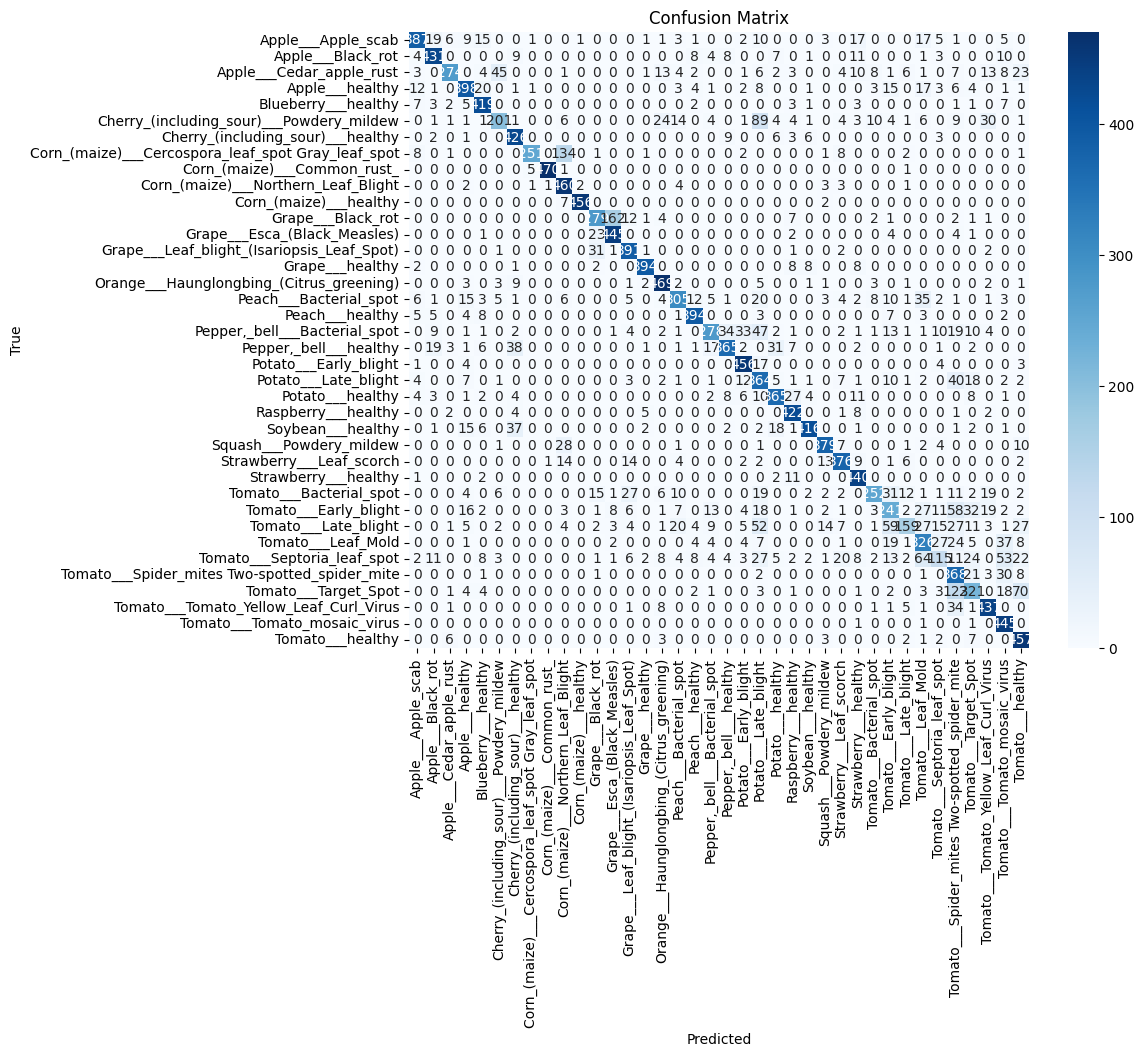

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


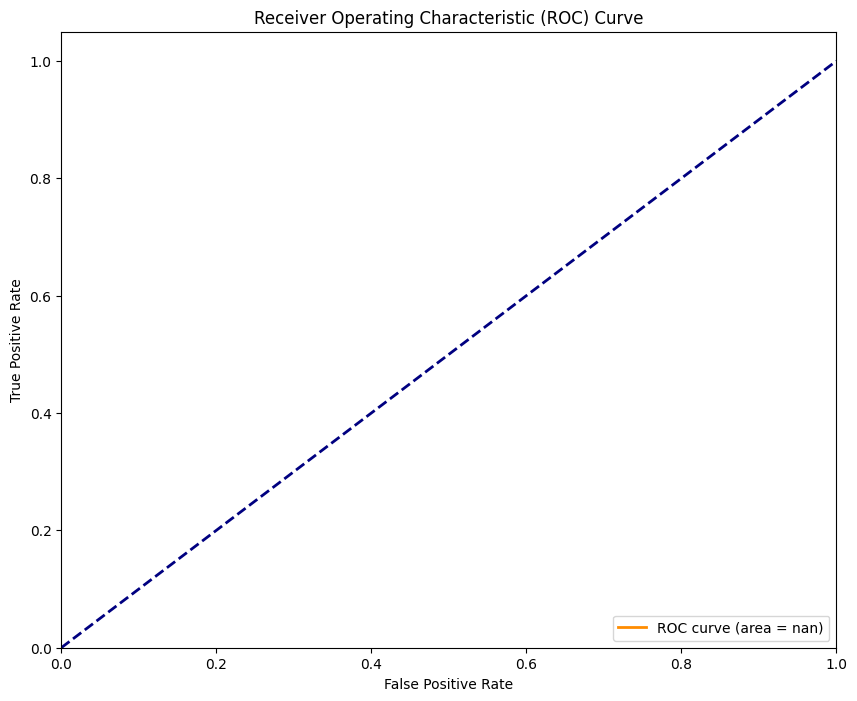

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Evaluate the model on the test data
model_evaluate = model.evaluate(test_generator)

# Print the evaluation results
print("Loss   : ", model_evaluate[0])
print("Accuracy   : ", model_evaluate[1])
print("Precision   : ", model_evaluate[2])
print("Recall   : ", model_evaluate[3])

# Get predictions for test data
test_predictions = model.predict(test_generator)
test_predictions = np.argmax(test_predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, test_predictions, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, test_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# If you're interested in plotting ROC curves and AUC for each class (only for binary/multi-class classification):
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC curve (for multi-class problems)
y_true_bin = label_binarize(true_labels, classes=list(test_generator.class_indices.keys()))
y_pred_bin = label_binarize(test_predictions, classes=list(test_generator.class_indices.keys()))

# Plot ROC curve for each class
fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Save the trained model
model.save('CNN_plantdiseases_model_sample.keras')


import pickle
import joblib
from tensorflow.keras.models import load_model

# Assuming 'model' is your trained Keras model
# Save the model in Keras format (.keras)
model.save('CNN_plantdiseases_model_sample.keras')

# Save the model in HDF5 format (.h5)
model.save('CNN_plantdiseases_model_sample.h5')

# Save the model using pickle (.pkl)
with open('CNN_plantdiseases_model_sample.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the model using joblib (.joblib)
joblib.dump(model, 'CNN_plantdiseases_model_sample.joblib')

print("Model saved in all formats: .keras, .h5, .pkl, .joblib")
